<a href="https://colab.research.google.com/github/kathygsb16/Evaluacion/blob/main/SegundaPrueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importacion de librerias

In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle as pckl
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm
from sklearn.preprocessing import Normalizer
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Cargar un archivo de datos

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
fileName = '/content/drive/MyDrive/M/senate2020.pkl'
data = pd.read_pickle(fileName)

# Tratamiento del DataSet

Al analizar por primera vez el data set, nos damos cuenta que es multiindice, por lo que debemos llevarlo a solo un indice.

1. Reseteamos el indice para que se generen como columnas.
2. Eliminamos la primera columna con la funcion **.drop**.
3. Nuevamente indexamos la nueva columna que necesitamos.
4. Renombramos el indice.



Ahora ya nuestro data set esta listo para aplicar el transpose.

In [11]:
data = data.reset_index().drop(['level_0'], axis=1).set_index('level_1').rename_axis('index')
dst = np.transpose(data).fillna(0)

Ahora las variables cualitativas las convertimos en cuantitativas para un mejor manejo de los datos.

In [12]:
for names in dst:
    dst[names].loc[(dst[names] == 'Si')] = 1
    dst[names].loc[(dst[names] == 'No')] = 2
    dst[names].loc[(dst[names] == 'Abstencion')] = 3
    dst[names].loc[(dst[names] == 'Pareo')] = 4

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


# Análisis Exploratorio

Veamos cuantas dimensiones y registros contiene

In [13]:
dst.shape

(424, 55)

Son 424 registros con 55 columnas. Veamos los primeros registros para tener una idea

In [14]:
dst.head()

index,"Latorre R., Juan Ignacio","Coloma C., Juan Antonio","García R., José","Bianchi C., Carlos","Navarro B., Alejandro","Allende B., Isabel","Lagos W., Ricardo","García Huidobro S., Alejandro","Guillier Á., Alejandro","Durana S., José Miguel",...,ABSTENCION,ETAPA,FECHA,NO,PAREO,QUORUM,SESION,SI,TEMA,TIPOVOTACION
0,1,1,1,1,1,1,1,1,4,1,...,0,Primer trámite constitucional,2018-12-12 00:00:00,0,1,Mayoría simple,77/366,15,"Proyecto de ley, en primer trámite constitucio...",Discusión general
1,2,0,1,1,1,1,0,0,1,1,...,0,Primer trámite constitucional,2020-06-02 00:00:00,1,0,0,31/368,37,Aprobación en particular del proyecto de ley q...,Discusión general
2,1,1,1,1,0,1,1,1,1,0,...,1,Primer trámite constitucional,2019-12-30 00:00:00,0,1,Cuatro séptimos Q.C.,89/367,27,"Proyecto de ley, en primer trámite constitucio...",Discusión general
3,1,1,1,1,1,0,0,1,1,1,...,0,Primer trámite constitucional,2019-03-05 00:00:00,0,0,Mayoría simple,94/366,39,"Proyecto de ley, en primer trámite constitucio...",Discusión general
4,1,1,1,1,1,1,1,1,1,1,...,0,Primer trámite constitucional,2020-01-29 00:00:00,0,0,Cuatro séptimos Q.C.,103/367,35,"Proyecto de ley, en primer trámite constitucio...",Discusión particular


Ahora veamos algunas estadísticas de nuestros datos

In [15]:
dst.describe()

index,"Latorre R., Juan Ignacio","Coloma C., Juan Antonio","García R., José","Bianchi C., Carlos","Navarro B., Alejandro","Allende B., Isabel","Lagos W., Ricardo","García Huidobro S., Alejandro","Guillier Á., Alejandro","Durana S., José Miguel",...,ABSTENCION,ETAPA,FECHA,NO,PAREO,QUORUM,SESION,SI,TEMA,TIPOVOTACION
count,424,424,424,424,424,424,424,424,424,424,...,424,424,424,424,424,424,424,424,424,424
unique,4,5,5,4,4,4,4,5,5,5,...,12,7,177,30,4,6,184,35,423,5
top,1,1,1,1,1,1,1,1,1,1,...,0,Segundo trámite constitucional,2018-08-21 00:00:00,0,0,Mayoría simple,41/366,35,"Proyecto de ley, en segundo trámite constituci...",Discusión general
freq,310,280,290,270,223,243,243,286,255,333,...,270,224,9,308,353,288,9,28,2,262


# Graficos

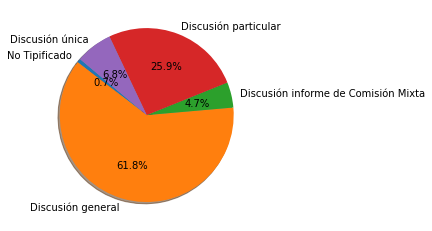

In [16]:
df_tipoVotacion = dst.groupby('TIPOVOTACION')['SI'].count()
lblTiposVotacion = 'No Tipificado','Discusión general', 'Discusión informe de Comisión Mixta','Discusión particular','Discusión única'
GrfPie1 = plt.pie(df_tipoVotacion, labels=lblTiposVotacion, autopct='%1.1f%%', shadow=True, startangle=140)

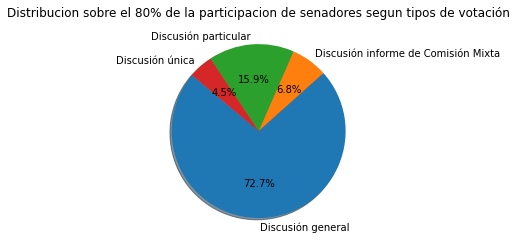

In [17]:
#Distribucion sobre el 80% de la participacion de senadores segun tipos de votación
df_tipoVotacion2 = dst[dst['SI'].astype(np.int64) > 36].groupby('TIPOVOTACION')['SI'].count()
lblTiposVotacion2 = 'Discusión general', 'Discusión informe de Comisión Mixta','Discusión particular','Discusión única'
plt.title('Distribucion sobre el 80% de la participacion de senadores segun tipos de votación')
GrfPie2 = plt.pie(df_tipoVotacion2, labels=lblTiposVotacion2, autopct='%1.1f%%', shadow=True, startangle=140)

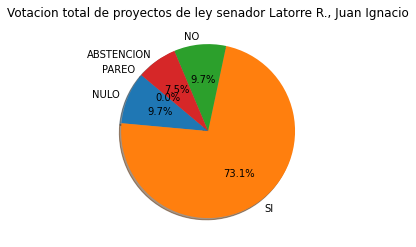

In [18]:
#Votacion General Senador Latorre R., Juan Ignacio
df_null_sen_JILR = pd.DataFrame(dst[dst['Latorre R., Juan Ignacio'].astype(np.int64) == 0], columns=['Latorre R., Juan Ignacio']).count()
df_si_sen_JILR = pd.DataFrame(dst[dst['Latorre R., Juan Ignacio'].astype(np.int64) == 1], columns=['Latorre R., Juan Ignacio']).count()
df_no_sen_JILR = pd.DataFrame(dst[dst['Latorre R., Juan Ignacio'].astype(np.int64) == 2], columns=['Latorre R., Juan Ignacio']).count()
df_abste_sen_JILR = pd.DataFrame(dst[dst['Latorre R., Juan Ignacio'].astype(np.int64) == 3], columns=['Latorre R., Juan Ignacio']).count()
df_pareo_sen_JILR = pd.DataFrame(dst[dst['Latorre R., Juan Ignacio'].astype(np.int64) == 4], columns=['Latorre R., Juan Ignacio']).count()

lbl_JILR = 'NULO', 'SI','NO','ABSTENCION', 'PAREO'
df_vota_JILR = pd.concat([df_null_sen_JILR, df_si_sen_JILR, df_no_sen_JILR, df_abste_sen_JILR, df_pareo_sen_JILR], axis=0)
plt.title('Votacion total de proyectos de ley senador Latorre R., Juan Ignacio')
GrfPie_JILR = plt.pie(df_vota_JILR, labels=lbl_JILR, autopct='%1.1f%%', shadow=True, startangle=140)

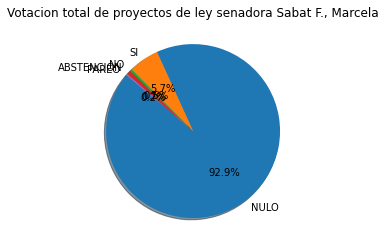

In [19]:
#Votacion General Senador Sabat F., Marcela
df_null_sen_MSF = pd.DataFrame(dst[dst['Sabat F., Marcela'].astype(np.int64) == 0], columns=['Sabat F., Marcela']).count()
df_si_sen_MSF = pd.DataFrame(dst[dst['Sabat F., Marcela'].astype(np.int64) == 1], columns=['Sabat F., Marcela']).count()
df_no_sen_MSF = pd.DataFrame(dst[dst['Sabat F., Marcela'].astype(np.int64) == 2], columns=['Sabat F., Marcela']).count()
df_abste_sen_MSF = pd.DataFrame(dst[dst['Sabat F., Marcela'].astype(np.int64) == 3], columns=['Sabat F., Marcela']).count()
df_pareo_sen_MSF = pd.DataFrame(dst[dst['Sabat F., Marcela'].astype(np.int64) == 4], columns=['Sabat F., Marcela']).count()

lbl_MSF = 'NULO', 'SI','NO','ABSTENCION', 'PAREO'
df_vota_MSF = pd.concat([df_null_sen_MSF, df_si_sen_MSF, df_no_sen_MSF, df_abste_sen_MSF, df_pareo_sen_MSF], axis=0)
plt.title('Votacion total de proyectos de ley senadora Sabat F., Marcela')
GrfPie_MSF = plt.pie(df_vota_MSF, labels=lbl_MSF, autopct='%1.1f%%', shadow=True, startangle=140)

In [20]:
df_null = []
df_si = []
df_no = []
df_abstencion = []
df_pareo = []

for fila in dst:
  if fila == 'ABSTENCION':
    break
  else:
    df_null.append(pd.DataFrame(dst[dst[fila].astype(np.int64) == 0], columns=[fila]).count())
    df_si.append(pd.DataFrame(dst[dst[fila].astype(np.int64) == 1], columns=[fila]).count())
    df_no.append(pd.DataFrame(dst[dst[fila].astype(np.int64) == 2], columns=[fila]).count())
    df_abstencion.append(pd.DataFrame(dst[dst[fila].astype(np.int64) == 3], columns=[fila]).count())
    df_pareo.append(pd.DataFrame(dst[dst[fila].astype(np.int64) == 4], columns=[fila]).count())

df_null = pd.DataFrame(pd.concat(df_null))
df_si = pd.DataFrame(pd.concat(df_si))
df_no = pd.DataFrame(pd.concat(df_no))
df_abstencion = pd.DataFrame(pd.concat(df_abstencion))
df_pareo = pd.DataFrame(pd.concat(df_pareo))

dffinal = pd.concat([df_null, df_si, df_no, df_abstencion, df_pareo], axis=1)
dffinal = dffinal.reset_index()
dffinal.columns = ['SENADORES', 'NULO', 'SI', 'NO', 'ABSTENCION', 'PAREO']

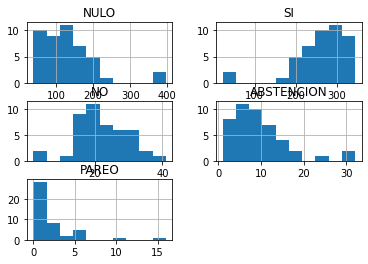

In [21]:
dffinal.drop('SENADORES',axis=1).hist()
#(['clase'],1).hist()
plt.show()

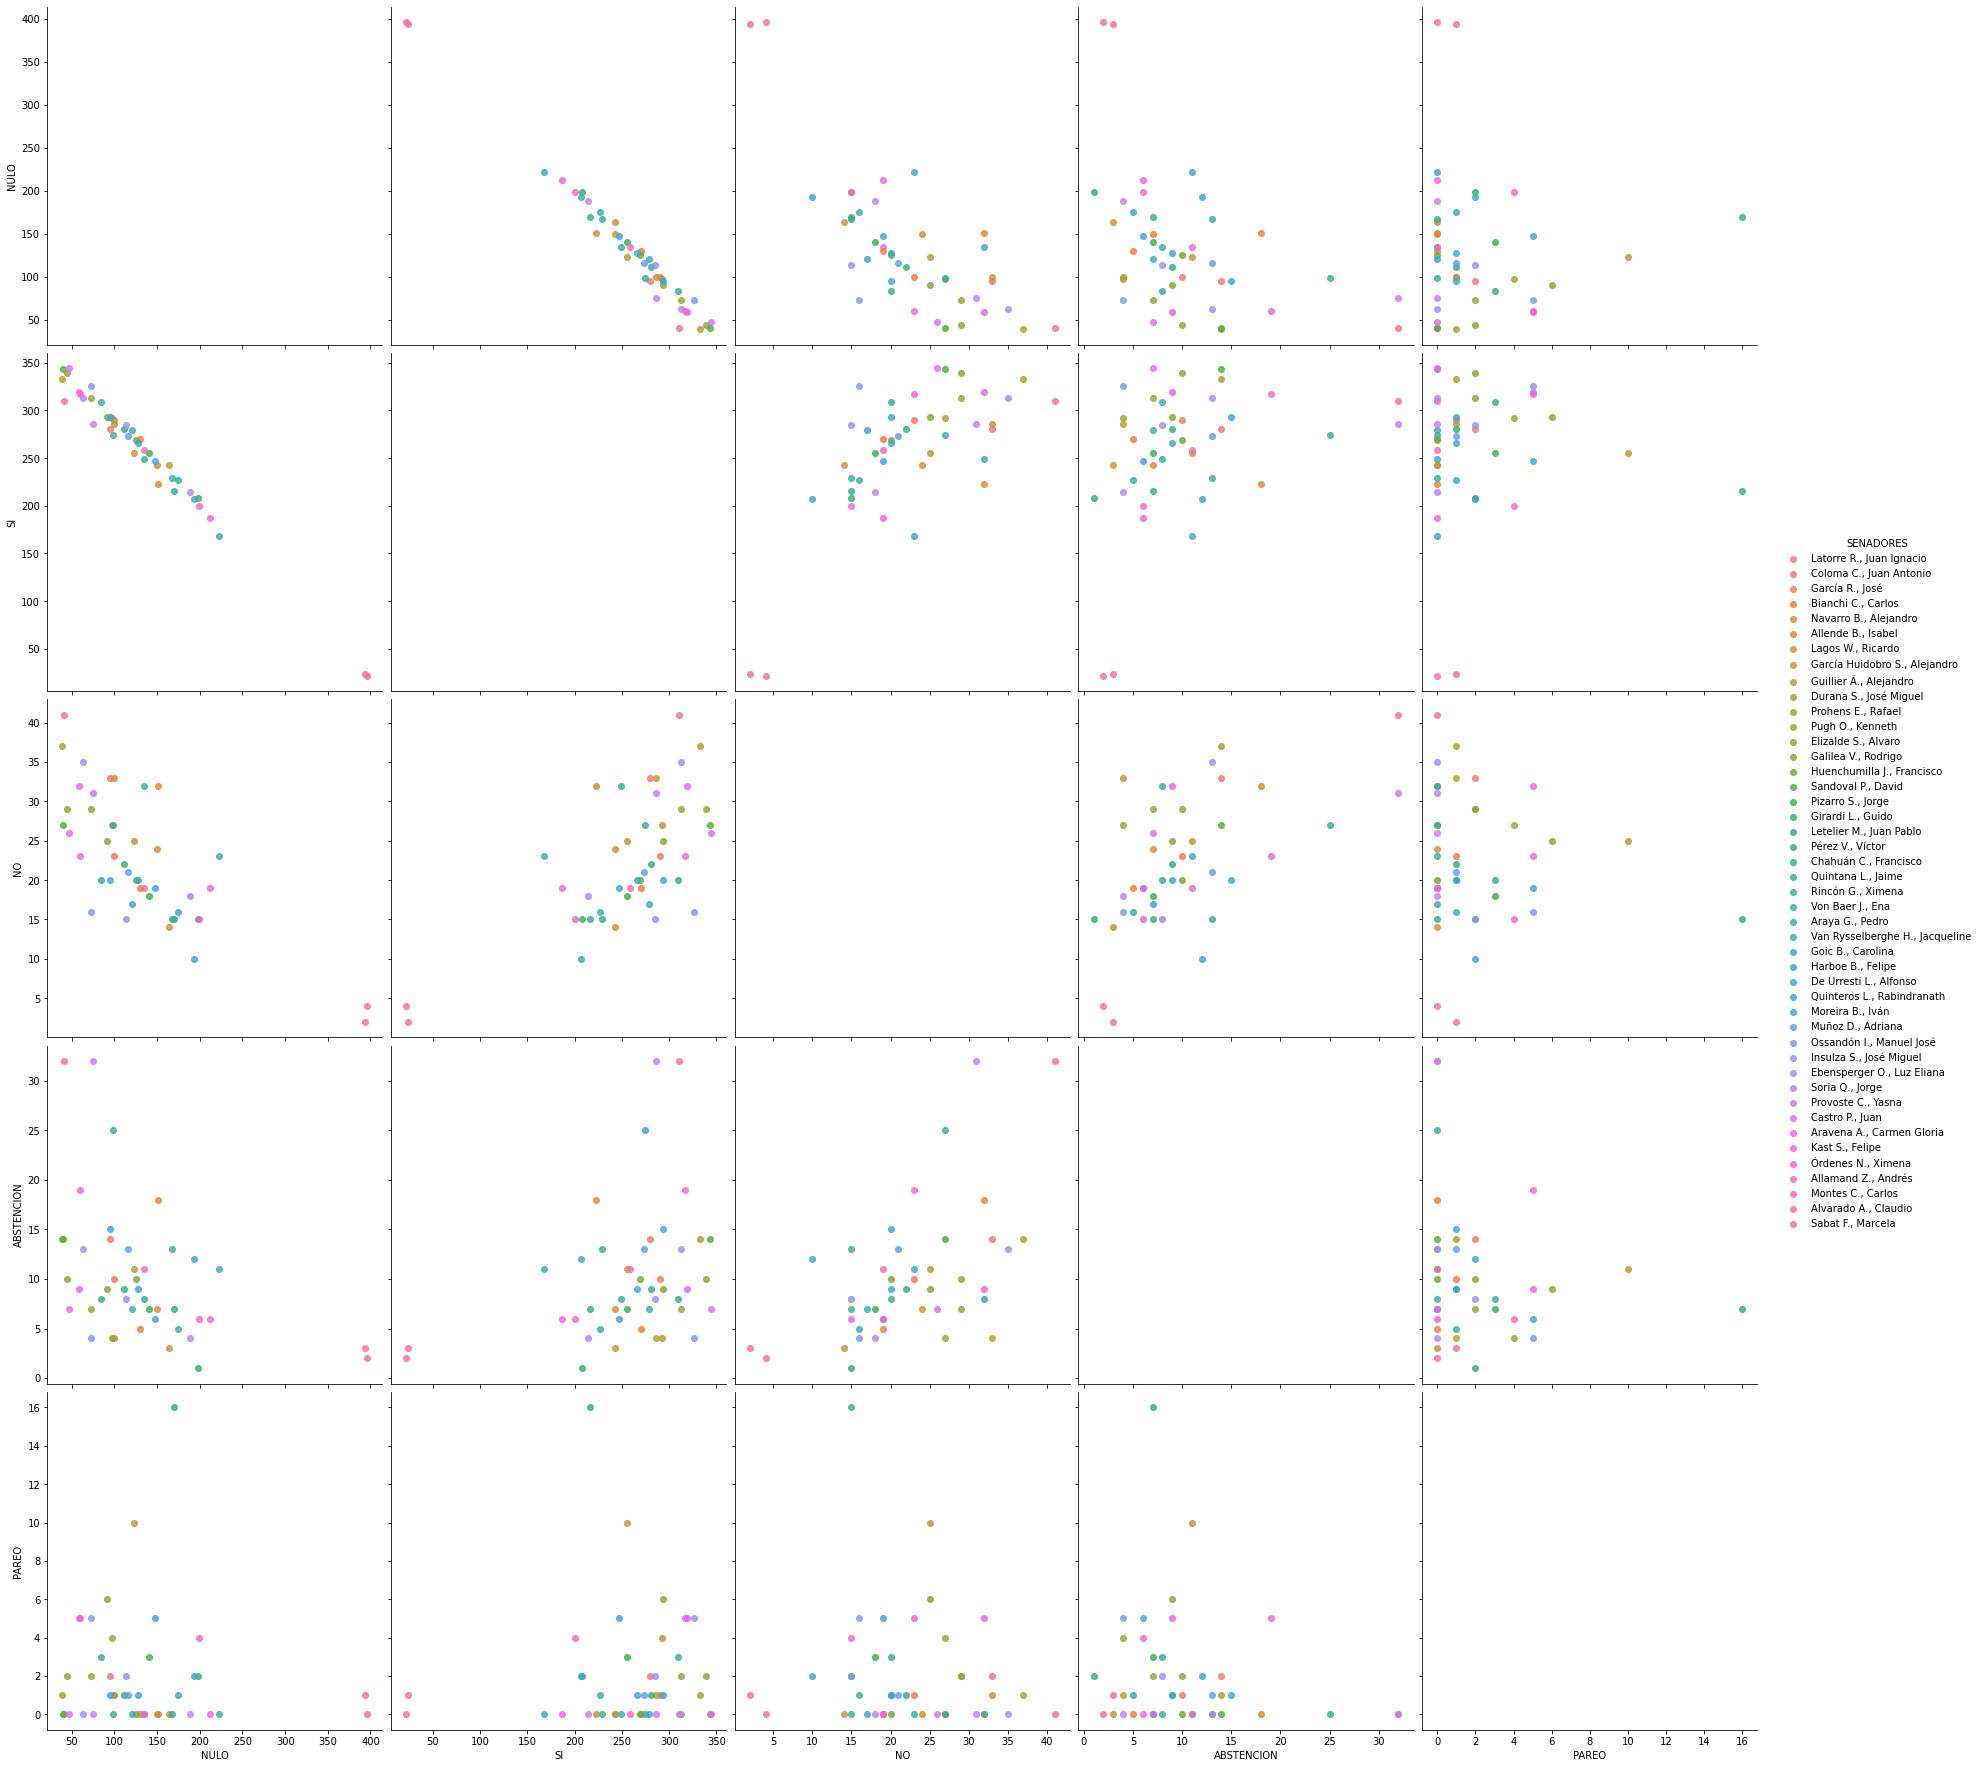

In [22]:
sns.pairplot(dffinal.dropna(), hue='SENADORES',height=5,vars=['NULO', 'SI', 'NO', 'ABSTENCION', 'PAREO'],kind='reg')

# Regresion Logistica

In [23]:
dfsen = pd.DataFrame(dffinal.SENADORES)
dfsen

,SENADORES
0,"Latorre R., Juan Ignacio"
1,"Coloma C., Juan Antonio"
2,"García R., José"
3,"Bianchi C., Carlos"
4,"Navarro B., Alejandro"
5,"Allende B., Isabel"
6,"Lagos W., Ricardo"
7,"García Huidobro S., Alejandro"
8,"Guillier Á., Alejandro"
9,"Durana S., José Miguel"


In [24]:
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Latorre R., Juan Ignacio")] = 0.1
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Coloma C., Juan Antonio")] = 0.2 
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "García R., José")] = 0.3
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Bianchi C., Carlos")] = 0.4
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Navarro B., Alejandro")] = 0.5
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Allende B., Isabel")] = 0.6
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Lagos W., Ricardo")] = 0.7
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "García Huidobro S., Alejandro")] = 0.8
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Guillier Á., Alejandro")] = 0.9
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Durana S., José Miguel")] = 1.1
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Prohens E., Rafael")] = 1.2
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Pugh O., Kenneth")] = 1.3
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Elizalde S., Alvaro")] = 1.4
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Galilea V., Rodrigo")] = 1.5
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Huenchumilla J., Francisco")] = 1.6
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Sandoval P., David")] = 1.7
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Pizarro S., Jorge")] = 1.8
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Girardi L., Guido")] = 1.9
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Letelier M., Juan Pablo")] = 21
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Pérez V., Víctor")] = 2.2
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Chahuán C., Francisco")] = 2.3
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Quintana L., Jaime")] = 2.4
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Rincón G., Ximena")] = 2.5
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Von Baer J., Ena")] = 2.6
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Araya G., Pedro")] = 2.7
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Van Rysselberghe H., Jacqueline")] = 2.8
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Goic B., Carolina")] = 2.9
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Harboe B., Felipe")] = 3.1
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "De Urresti L., Alfonso")] = 3.2
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Quinteros L., Rabindranath")] = 3.3
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Moreira B., Iván")] = 3.4
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Muñoz D., Adriana")] = 3.5
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Ossandón I., Manuel José")] = 3.6
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Insulza S., José Miguel")] = 3.7
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Ebensperger O., Luz Eliana")] = 3.8
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Soria Q., Jorge")] = 3.9
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Provoste C., Yasna")] = 4.1
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Castro P., Juan")] = 4.2
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Aravena A., Carmen Gloria")] = 4.3
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Kast S., Felipe")] = 4.4
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Órdenes N., Ximena")] = 4.5
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Allamand Z., Andrés")] = 4.6
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Montes C., Carlos")] = 4.7
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Alvarado A., Claudio")] = 4.8
dfsen['SENADORES'].loc[(dfsen['SENADORES'] == "Sabat F., Marcela")] = 4.9
g = pd.DataFrame(dfsen['SENADORES'])
g.columns = ['VALUE']
g

,VALUE
0,0.1
1,0.2
2,0.3
3,0.4
4,0.5
5,0.6
6,0.7
7,0.8
8,0.9
9,1.1


In [25]:
#dffinal.columns = ['VALUE','SENADORES', 'NULO', 'SI', 'NO', 'ABSTENCION', 'PAREO']
dffinal = pd.concat([g,dffinal], axis=1)
dffinal

,VALUE,SENADORES,NULO,SI,NO,ABSTENCION,PAREO
0,0.1,"Latorre R., Juan Ignacio",41,310,41,32,0
1,0.2,"Coloma C., Juan Antonio",95,280,33,14,2
2,0.3,"García R., José",100,290,23,10,1
3,0.4,"Bianchi C., Carlos",130,270,19,5,0
4,0.5,"Navarro B., Alejandro",151,223,32,18,0
5,0.6,"Allende B., Isabel",150,243,24,7,0
6,0.7,"Lagos W., Ricardo",164,243,14,3,0
7,0.8,"García Huidobro S., Alejandro",100,286,33,4,1
8,0.9,"Guillier Á., Alejandro",123,255,25,11,10
9,1.1,"Durana S., José Miguel",39,333,37,14,1


In [26]:
X = np.array(dffinal.drop(['SENADORES'],1))
y = np.array(dffinal['VALUE'])
y = y.astype('int')
X.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


(45, 6)

In [27]:
model = linear_model.LogisticRegression(max_iter=1000)
model.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=1000)

In [28]:
predictions = model.predict(X)
print(predictions[0:44])

[ 0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  0 21  2  1  2  2  2
  2  2  3  3  3  3  3  3  3  3  4  3  4  3  4  4  4  4  4  4]


In [29]:
model.score(X,y)

0.8888888888888888

In [30]:
validation_size = 0.2
seed = 45
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=42)

In [31]:
from sklearn.model_selection import KFold
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=2, random_state=seed, shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.277778 (0.055556)


In [32]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.8888888888888888


# SVM

In [33]:
clf = svm.SVC(gamma=0.001, C=100)

X2,y2 = X,y
clf.fit(X2,y2)

SVC(C=100, gamma=0.001)

In [34]:
print('Predicción: ',clf.predict([dffinal['VALUE'].head(6)]))

Predicción:  [2]


# BAGGING

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.2)
mo = DecisionTreeRegressor() 
model = BaggingRegressor(mo, n_estimators=10)

params = {"base_estimator__max_depth": [2,3],   # [3,4,5]
          "max_samples": [0.1,0.2],
          "base_estimator__min_samples_split": [2,3,4]}  # [2,3,4]
grid = GridSearchCV(estimator=model, param_grid=params,cv=5)
_=grid.fit(Xtrain, Ytrain)

In [36]:
print(grid.best_score_)
print(grid.best_params_)

0.32072728759125474
{'base_estimator__max_depth': 3, 'base_estimator__min_samples_split': 4, 'max_samples': 0.2}


In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Yhat = grid.predict(Xtest)

mse = mean_squared_error(Ytest, Yhat)
mae = mean_absolute_error(Ytest, Yhat)
R2 = r2_score(Ytest, Yhat)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  0.25180555555555556
MAE:  0.37592592592592594
R^2:  0.8038822115384615


#RandomForest

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()

params = {"n_estimators": [100],
          #"max_depth": [2,3], 
          "min_samples_split": [2,3,4], 
          "max_leaf_nodes": [5,8,10,15]}

grid = GridSearchCV(estimator=model, param_grid=params,cv=5)
_=grid.fit(Xtrain, Ytrain)

In [39]:
print(grid.best_score_)
print(grid.best_params_)

0.9457551798022175
{'max_leaf_nodes': 10, 'min_samples_split': 2, 'n_estimators': 100}


# AdaBoost

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.2)

mo = DecisionTreeRegressor() 
model = AdaBoostRegressor(mo)

params = {"n_estimators": [10],
          "base_estimator__max_depth": [2,3],
          "base_estimator__max_leaf_nodes": [5,8],
          "base_estimator__min_samples_split": [2,3,4]} 

grid = GridSearchCV(estimator=model, param_grid=params,cv=5)
_=grid.fit(Xtrain, Ytrain)

In [41]:
print(grid.best_score_)
print(grid.best_params_)

0.8164286539155963
{'base_estimator__max_depth': 3, 'base_estimator__max_leaf_nodes': 8, 'base_estimator__min_samples_split': 4, 'n_estimators': 10}


In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Yhat = grid.predict(Xtest)

mse = mean_squared_error(Ytest, Yhat)
mae = mean_absolute_error(Ytest, Yhat)
R2 = r2_score(Ytest, Yhat)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  0.0
MAE:  0.0
R^2:  1.0


# Gradient Boosting

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.2)

model = GradientBoostingRegressor()

params = {"n_estimators": [10],
          "learning_rate": [0.01],
          #"max_depth": [2,3,5,10], 
          "min_samples_split": [2,3,4], 
          "max_leaf_nodes": [5,10,15,20]
          }

grid = GridSearchCV(estimator=model, param_grid=params,cv=5)
_=grid.fit(Xtrain, Ytrain)

In [44]:
print(grid.best_score_)
print(grid.best_params_)

-0.2696030651334423
{'learning_rate': 0.01, 'max_leaf_nodes': 5, 'min_samples_split': 2, 'n_estimators': 10}


In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Yhat = grid.predict(Xtest)

mse = mean_squared_error(Ytest, Yhat)
mae = mean_absolute_error(Ytest, Yhat)
R2 = r2_score(Ytest, Yhat)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  40.96335146097328
MAE:  3.1980098554911396
R^2:  -0.10527364035270992
